# 1. Basic concept of Scaling

## Concept

If a variable is too large or too small, its influence on the target may not be applied. To solve the problem, Scaling adjusts each variable to values between 0 and 1.

* **Standard scaling** : Convert the mean to 0 and the standard deviation to 1. Also known as standardization. x' = (x - u) / s

* **Min-Max scaling** : Convert the maximum value to 1 and the minimum value to 0. Also known as normalization. x' = (x - x_min) / (x_max - x_min) 

* **Maximum absolute scaling** : Convert the absolute value to between 0 and 1. In other words, convert between -1 and 1.

* **Robust scaling** : Convert center value (median) to 0 and interquartile range (IQR) to 1. Minimize the impact of the outlier.

<Example>

**Example**

In [1]:
#필요한 라이브러리 import

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#데이터 로드

df_train = pd.DataFrame([
        [2,1,0],
        [3,2,0],
        [3,4,0],
        [5,5,1],
        [7,5,1],
        [2,5,0],
        [8,9,1],
        [9,10,1],
        [6,12,1]
    ], columns=['hour','attendance','pass'])
df_test = pd.DataFrame([
        [9,2,1],
        [6,10,1],
        [2,4,0]
    ], columns=['hour','attendance','pass'])

In [7]:
#데이터 전처리

# df_x_train = df_train.drop(['pass'],axis='columns')
# df_x_test = df_test.drop(['pass'],axis='columns')
# df_y_train = df_train.drop(['hour','attendance'],axis='columns')
# df_y_test = df_test.drop(['hour','attendance'],axis='columns')
df_y_test.head()

,pass
0,1
1,1
2,0


In [8]:
###스케일링1 : standard

scaler = StandardScaler()
x_train_standard = scaler.fit_transform(df_x_train)

df_x_train_standard = pd.DataFrame(x_train_standard, columns=['hour','attendance'])
df_x_train_standard.head()

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,hour,attendance
0,-1.202676,-1.405528
1,-0.801784,-1.118034
2,-0.801784,-0.543045
3,0.000000,-0.255551
4,0.801784,-0.255551


In [9]:
###스케일링2 : minmax

scaler = MinMaxScaler()
x_train_minmax = scaler.fit_transform(df_x_train)

df_x_train_minmax = pd.DataFrame(x_train_minmax, columns=['hour','attendance'])

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


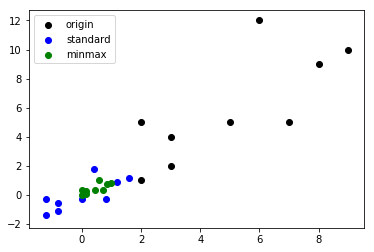

In [10]:
#그래프 그리기

plt.scatter(df_x_train['hour'], df_x_train['attendance'], label = 'origin', c='BLACK')
plt.scatter(df_x_train_standard['hour'], df_x_train_standard['attendance'], label = 'standard', c='BLUE')
plt.scatter(df_x_train_minmax['hour'], df_x_train_minmax['attendance'], label = 'minmax', c='GREEN')
plt.legend()
plt.show()

### ※ [참고] Comparison of Scalers for normal distribution data

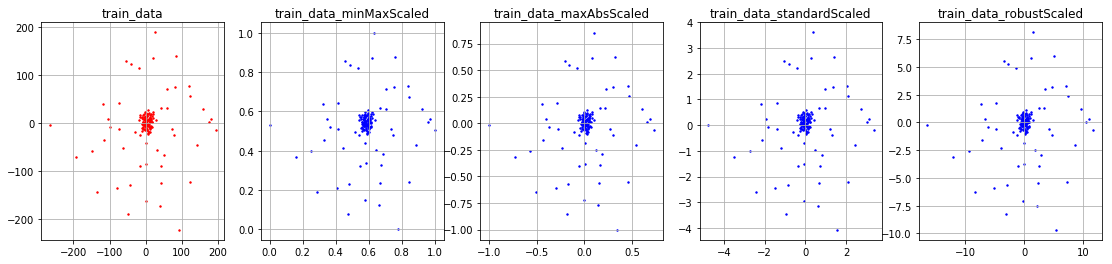

☞ The choice of optimal scaler depends on a case-by-case basis. A good scaler maintains the good characteristics of the data and removes the bad properties while minimizing the effect on other columns (attributes).

******************************

* ref : https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

# 2. Example of Scaling with Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv('./dataset/scalingTestData.csv', index_col=0)
# df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [27]:
# Scaling : standardize (normalize) the data scale to prep for KNN algorithm

from sklearn.preprocessing import StandardScaler            # other scaler : MinMaxScaler, MaxAbsScaler, RobustScaler
scaler = StandardScaler()

# Fit and transform the object to all the data except the Target Class
scaled_features = scaler.fit_transform(df.drop('TARGET CLASS', axis=1))
##scaled_features[:5]

# Convert the scaled features to data frame typed features
df_scaled_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])
#df_scaled_features.head()

X = df_scaled_features

In [28]:
# (optional) if you don't want to scale
# X = df.loc[:, 'WTT':'NXJ']

In [29]:
# Split the normalized data into training and test sets
from sklearn.model_selection import train_test_split
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
# Create and Train the Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
# Make Predictions
pred = knn.predict(X_test)
#pred

In [32]:
# Evaluate the predictions
knn.score(X_test, y_test)

0.95